In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,31,81,93
1,2,Male,50,85,26
2,3,Female,36,85,75
3,4,Male,42,86,20
4,5,Female,33,86,95


In [20]:
# statistical info
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,179.000000,179.000000,179.000000,179.000000
mean,91.877095,39.452514,65.430168,50.201117
std,55.034376,13.794305,23.309577,24.893567
min,1.000000,18.000000,24.000000,1.000000
25%,45.500000,29.000000,48.000000,35.000000
50%,90.000000,37.000000,63.000000,50.000000
75%,134.500000,49.000000,78.000000,70.000000
max,200.000000,70.000000,137.000000,97.000000


In [21]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              179 non-null    int64 
 1   Gender                  179 non-null    object
 2   Age                     179 non-null    int64 
 3   Annual Income (k$)      179 non-null    int64 
 4   Spending Score (1-100)  179 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


In [ ]:
sns.distplot(df['Gender'])

<Axes: xlabel='Age', ylabel='Density'>

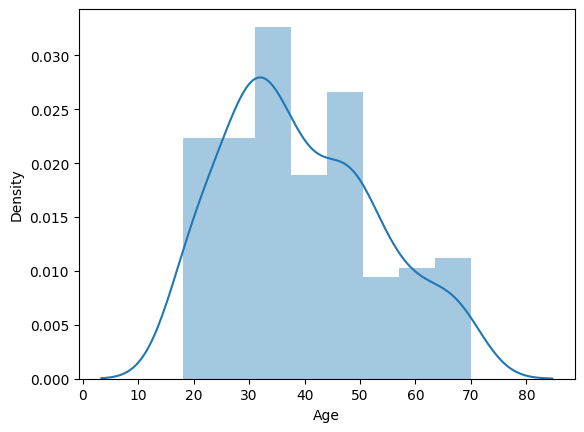

In [22]:
sns.distplot(df['Age'])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

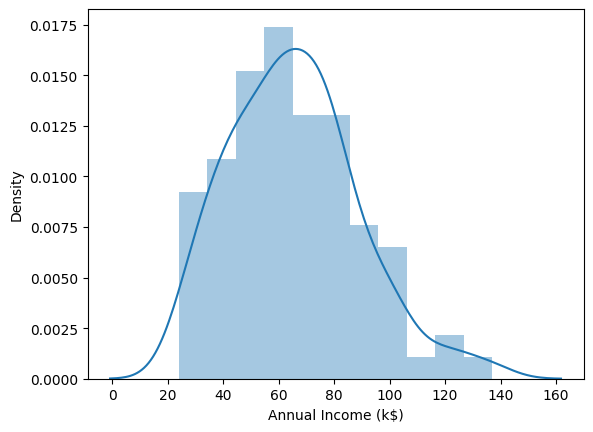

In [24]:
sns.distplot(df['Annual Income (k$)'])

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

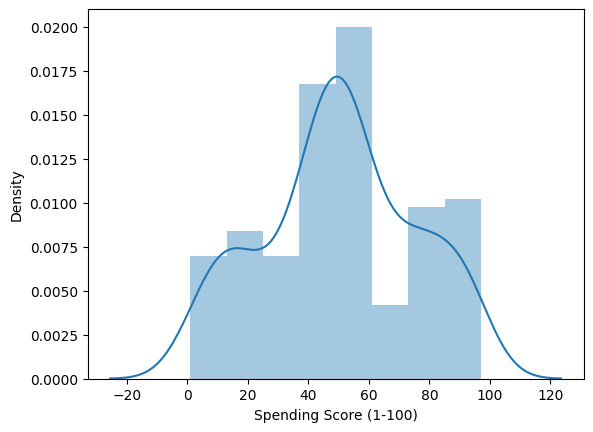

In [25]:
sns.distplot(df['Spending Score (1-100)'])

<Axes: >

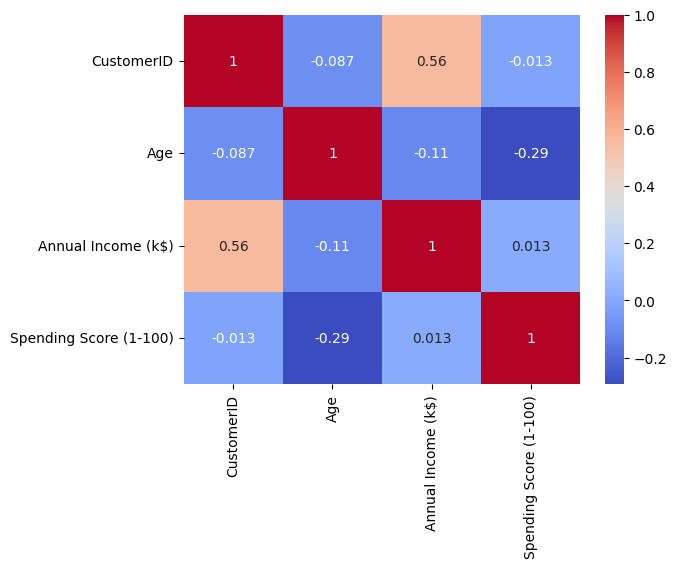

In [26]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [27]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,31,81,93
1,2,Male,50,85,26
2,3,Female,36,85,75
3,4,Male,42,86,20
4,5,Female,33,86,95


In [28]:
# cluster on 2 features
df1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,81,93
1,85,26
2,85,75
3,86,20
4,86,95


In [30]:
# scatter plot
sns.scatterplot(df1['Annual Income (k$)'], df1['Spending Score (1-100)'])

TypeError: ignored

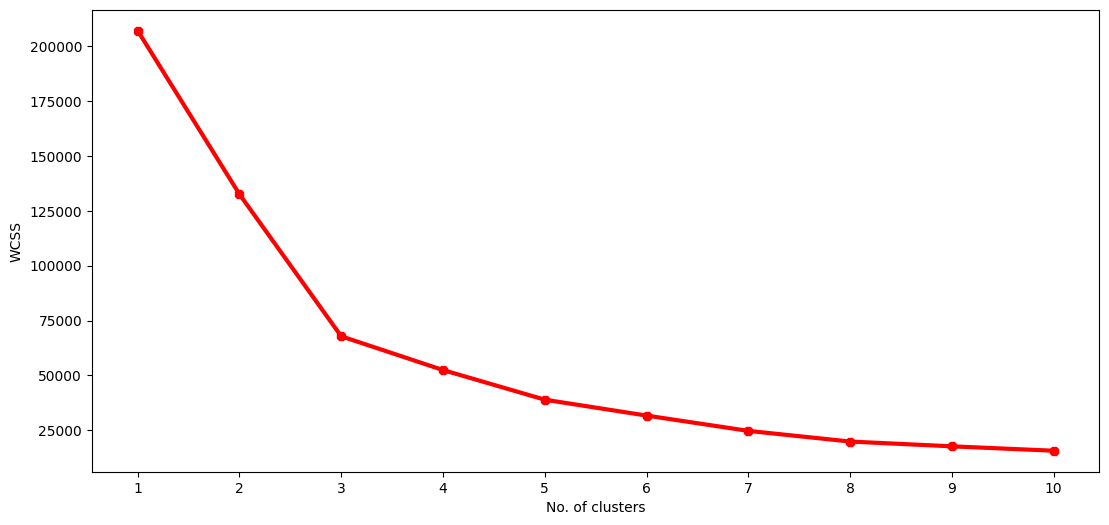

In [31]:
from sklearn.cluster import KMeans
errors = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df1)
    errors.append(kmeans.inertia_)
# plot the results for elbow method
plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth=3, color='red', marker='8')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [32]:
km = KMeans(n_clusters=5)
km.fit(df1)
y = km.predict(df1)
df1['Label'] = y
df1.head()

,Annual Income (k$),Spending Score (1-100),Label
0,81,93,1
1,85,26,3
2,85,75,1
3,86,20,3
4,86,95,1


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

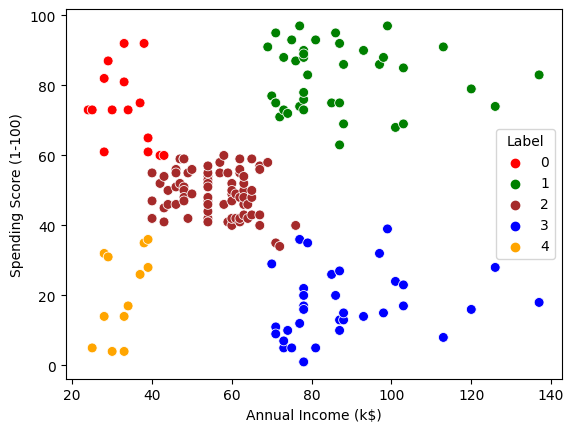

In [33]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                data=df1, hue='Label', s=50, palette=['red', 'green', 'brown', 'blue', 'orange'])

In [35]:
# cluster on 3 features
df2 = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]
df2.head()

,Annual Income (k$),Spending Score (1-100),Age
0,81,93,31
1,85,26,50
2,85,75,36
3,86,20,42
4,86,95,33


In [36]:
km = KMeans(n_clusters=5)
km.fit(df2)
y = km.predict(df2)
df2['Label'] = y
df2.head()

,Annual Income (k$),Spending Score (1-100),Age,Label
0,81,93,31,2
1,85,26,50,1
2,85,75,36,2
3,86,20,42,1
4,86,95,33,2


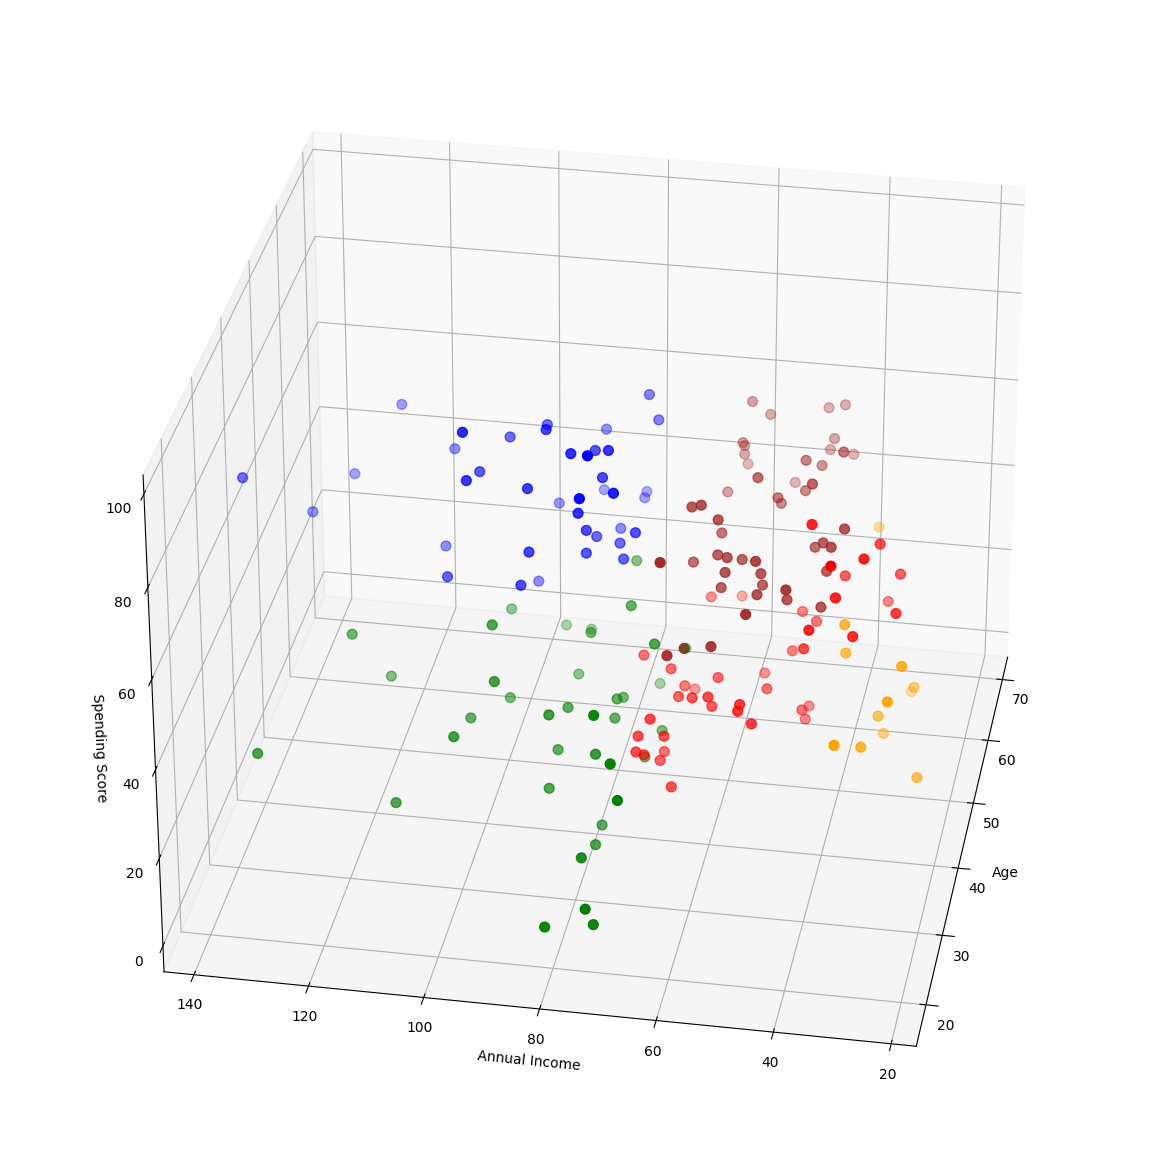

In [37]:
# 3d scatter plot
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df2['Age'][df2['Label']==0],
           df2['Annual Income (k$)'][df2['Label']==0],
           df2['Spending Score (1-100)'][df2['Label']==0], c='red', s=50)
ax.scatter(df2['Age'][df2['Label']==1],
           df2['Annual Income (k$)'][df2['Label']==1],
           df2['Spending Score (1-100)'][df2['Label']==1], c='green', s=50)
ax.scatter(df2['Age'][df2['Label']==2],
           df2['Annual Income (k$)'][df2['Label']==2],
           df2['Spending Score (1-100)'][df2['Label']==2], c='blue', s=50)
ax.scatter(df2['Age'][df2['Label']==3],
           df2['Annual Income (k$)'][df2['Label']==3],
           df2['Spending Score (1-100)'][df2['Label']==3], c='brown', s=50)
ax.scatter(df2['Age'][df2['Label']==4],
           df2['Annual Income (k$)'][df2['Label']==4],
           df2['Spending Score (1-100)'][df2['Label']==4], c='orange', s=50)
ax.view_init(30, 190)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()